## Confidence Intervals

### Small Sample Sizes

In the previous lesson, we learned how to calculate confidence intervals for large sample sizes. We built on our knowledge of the Central Limit Theorem, which stipulates that the sampling distribution of an estimator (in our case, the *mean*) will be normally distributed for large sample sizes. 

But we had noted that the Central Limit Theorem does not hold for small sample sizes.

Remember, we had also seen that the variance of the sample mean was greater at small sample sizes (the law of large numbers). Well, it happens that at small sample sizes, the variance of an estimator is greater than that expected from a normal distribution.  

### Enters, The T-Distribution

When we have a small sample size, we can no longer assume that the sampling distribution of the mean follows a normal distribution. Instead, we use a t-distribution. A t-distribution is similar to a normal distribution, but it has heavier tails. This means that it is more likely to get extreme values than a normal distribution. The t-distribution is also symmetric and centered at 0.

Let's take a look:


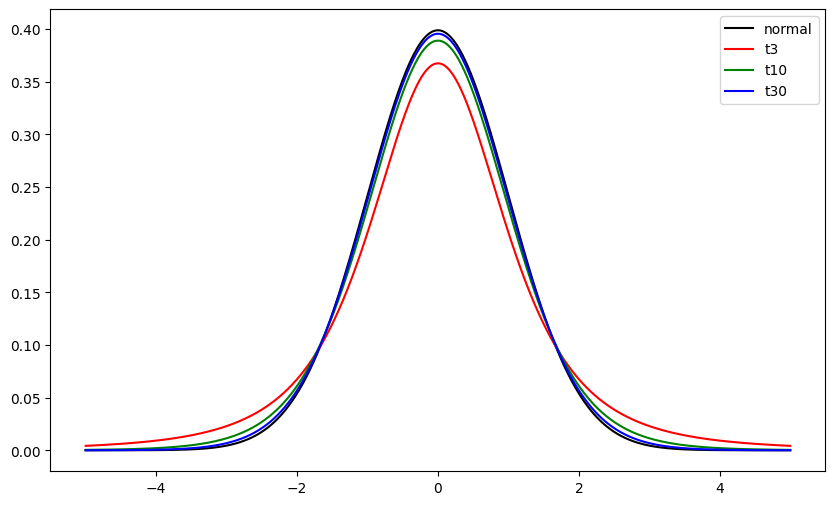

In [3]:
# plot the normal in black and the t-distribution for degrees of freedom 3, 10, 30 in red, green, blue
# add a legend

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# set figure size 
plt.figure(figsize=(10, 6))

x = np.linspace(-5, 5, 1000)
y = norm.pdf(x)
y3 = t.pdf(x, 3)
y10 = t.pdf(x, 10)
y30 = t.pdf(x, 30)

plt.plot(x, y, 'k', label='normal')
plt.plot(x, y3, 'r', label='t3')
plt.plot(x, y10, 'g', label='t10')
plt.plot(x, y30, 'b', label='t30')

plt.legend()
plt.show()


Notice that as the degrees of freedom increases, the t-distribution approaches the normal distribution. This is why we use the normal distribution for large sample sizes.


## The T-Interval

The t-interval is very similar to the z-interval. It is centered around the mean and measured in standard deviations. The only difference is that we multiply by the t-quantile instead of the z-quantile. Let's take a look at the formula:

$$\bar{x} \pm t_{\frac{\alpha}{2},n-1} \frac{s}{\sqrt{n}}$$

where $t_{\frac{\alpha}{2},n-1}$ is the t-quantile, $s$ is the sample standard deviation, and $n$ is the sample size.

### Example

Let's get a feel for the impact of the t-quantile on the t-interval and why we use it. 

Let's say we have a sample size of 10 and we want to calculate a 95% confidence interval. We can use the `t.ppf()` function from the `scipy.stats` library to calculate the t-quantile. The `t.ppf()` function takes in two arguments. The first argument is the confidence level, and the second argument is the degrees of freedom. Let's take a look:



In [9]:
# lets's assume we are sampling from a distribution with mean 240 and standard deviation 20

from scipy.stats import norm, t

# set parameters
mu = 240
sigma = 20
n = 3
alpha = 0.025 # 95% confidence interval

# our sample
sample= norm.rvs(mu, sigma, n)

# our estimators: sample mean and standard deviation
sample_mean= np.mean(sample)
sample_std= np.std(sample, ddof=1)

print(f"My sample mean: {sample_mean:.2f}")
print(f"My sample std: {sample_std:.2f}")

# calculate the 95% confidence interval for the mean using the normal distribution
lower_bound_norm= sample_mean - norm.ppf(1-alpha)*sample_std/np.sqrt(n)
upper_bound_norm= sample_mean + norm.ppf(1-alpha)*sample_std/np.sqrt(n)

# calculate the 95% confidence interval for the mean using the t distribution
lower_bound_t= sample_mean - t.ppf(1-alpha, n-1)*sample_std/np.sqrt(n)
upper_bound_t= sample_mean + t.ppf(1-alpha, n-1)*sample_std/np.sqrt(n)

print(f" 95% confidence interval for the mean using the normal distribution: ({lower_bound_norm:.2f}, {upper_bound_norm:.2f})")
print(f" 95% confidence interval for the mean using the t distribution: ({lower_bound_t:.2f}, {upper_bound_t:.2f})")



My sample mean: 232.39
My sample std: 15.37
 95% confidence interval for the mean using the normal distribution: (214.99, 249.79)
 95% confidence interval for the mean using the t distribution: (194.20, 270.58)


Notice how the bounds of the interval are wider than the bounds of the z-interval. This gives you a "safer" margin of error when you have a small sample size. 